## Importing required libraies

In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv(r"C:\Users\omkar\Downloads\KNN_Project_Data.csv") #load data

In [6]:
df# read data

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0    1636.670614   817.988525  2565.995189  358.347163   550.417491   
1    1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2    1300.035501   820.518697  2025.854469  525.562292   922.206261   
3    1059.347542  1066.866418   612.000041  480.827789   419.467495   
4    1018.340526  1313.679056   950.622661  724.742174   843.065903   
..           ...          ...          ...         ...          ...   
995  1343.060600  1289.142057   407.307449  567.564764  1000.953905   
996   938.847057  1142.884331  2096.064295  483.242220   522.755771   
997   921.994822   607.996901  2065.482529  497.107790   457.430427   
998  1157.069348   602.749160  1548.809995  646.809528  1335.737820   
999  1287.150025  1303.600085  2247.287535  664.362479  1132.682562   

            HYKR         EDFS        GUUB         MGJM         JHZC  \
0    1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1    2084.107872   853.404981  447.157619  1193.032521   861.081809   
2    2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3     685.666983   852.867810  341.664784  1154.391368  1450.935357   
4    1370.554164   905.469453  658.118202   539.459350  1899.850792   
..           ...          ...         ...          ...          ...   
995   919.602401   485.269059  668.007397  1124.772996  2127.628290   
996  1703.169782  2007.548635  533.514816   379.264597   567.200545   
997  1577.506205  1659.197738  186.854577   978.340107  1943.304912   
998  1455.504390  2788.366441  552.388107  1264.818079  1331.879020   
999   991.774941  2007.676371  251.916948   846.167511   952.895751   

     TARGET CLASS  
0               0  
1               1  
2               1  
3               0  
4               0  
..            ...  
995             0  
996             1  
997             1  
998             1  
999             1  

[1000 rows x 11 columns]

In [7]:
df.head() 

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

## Paiplot Visualization to check the relation of columns/ Features

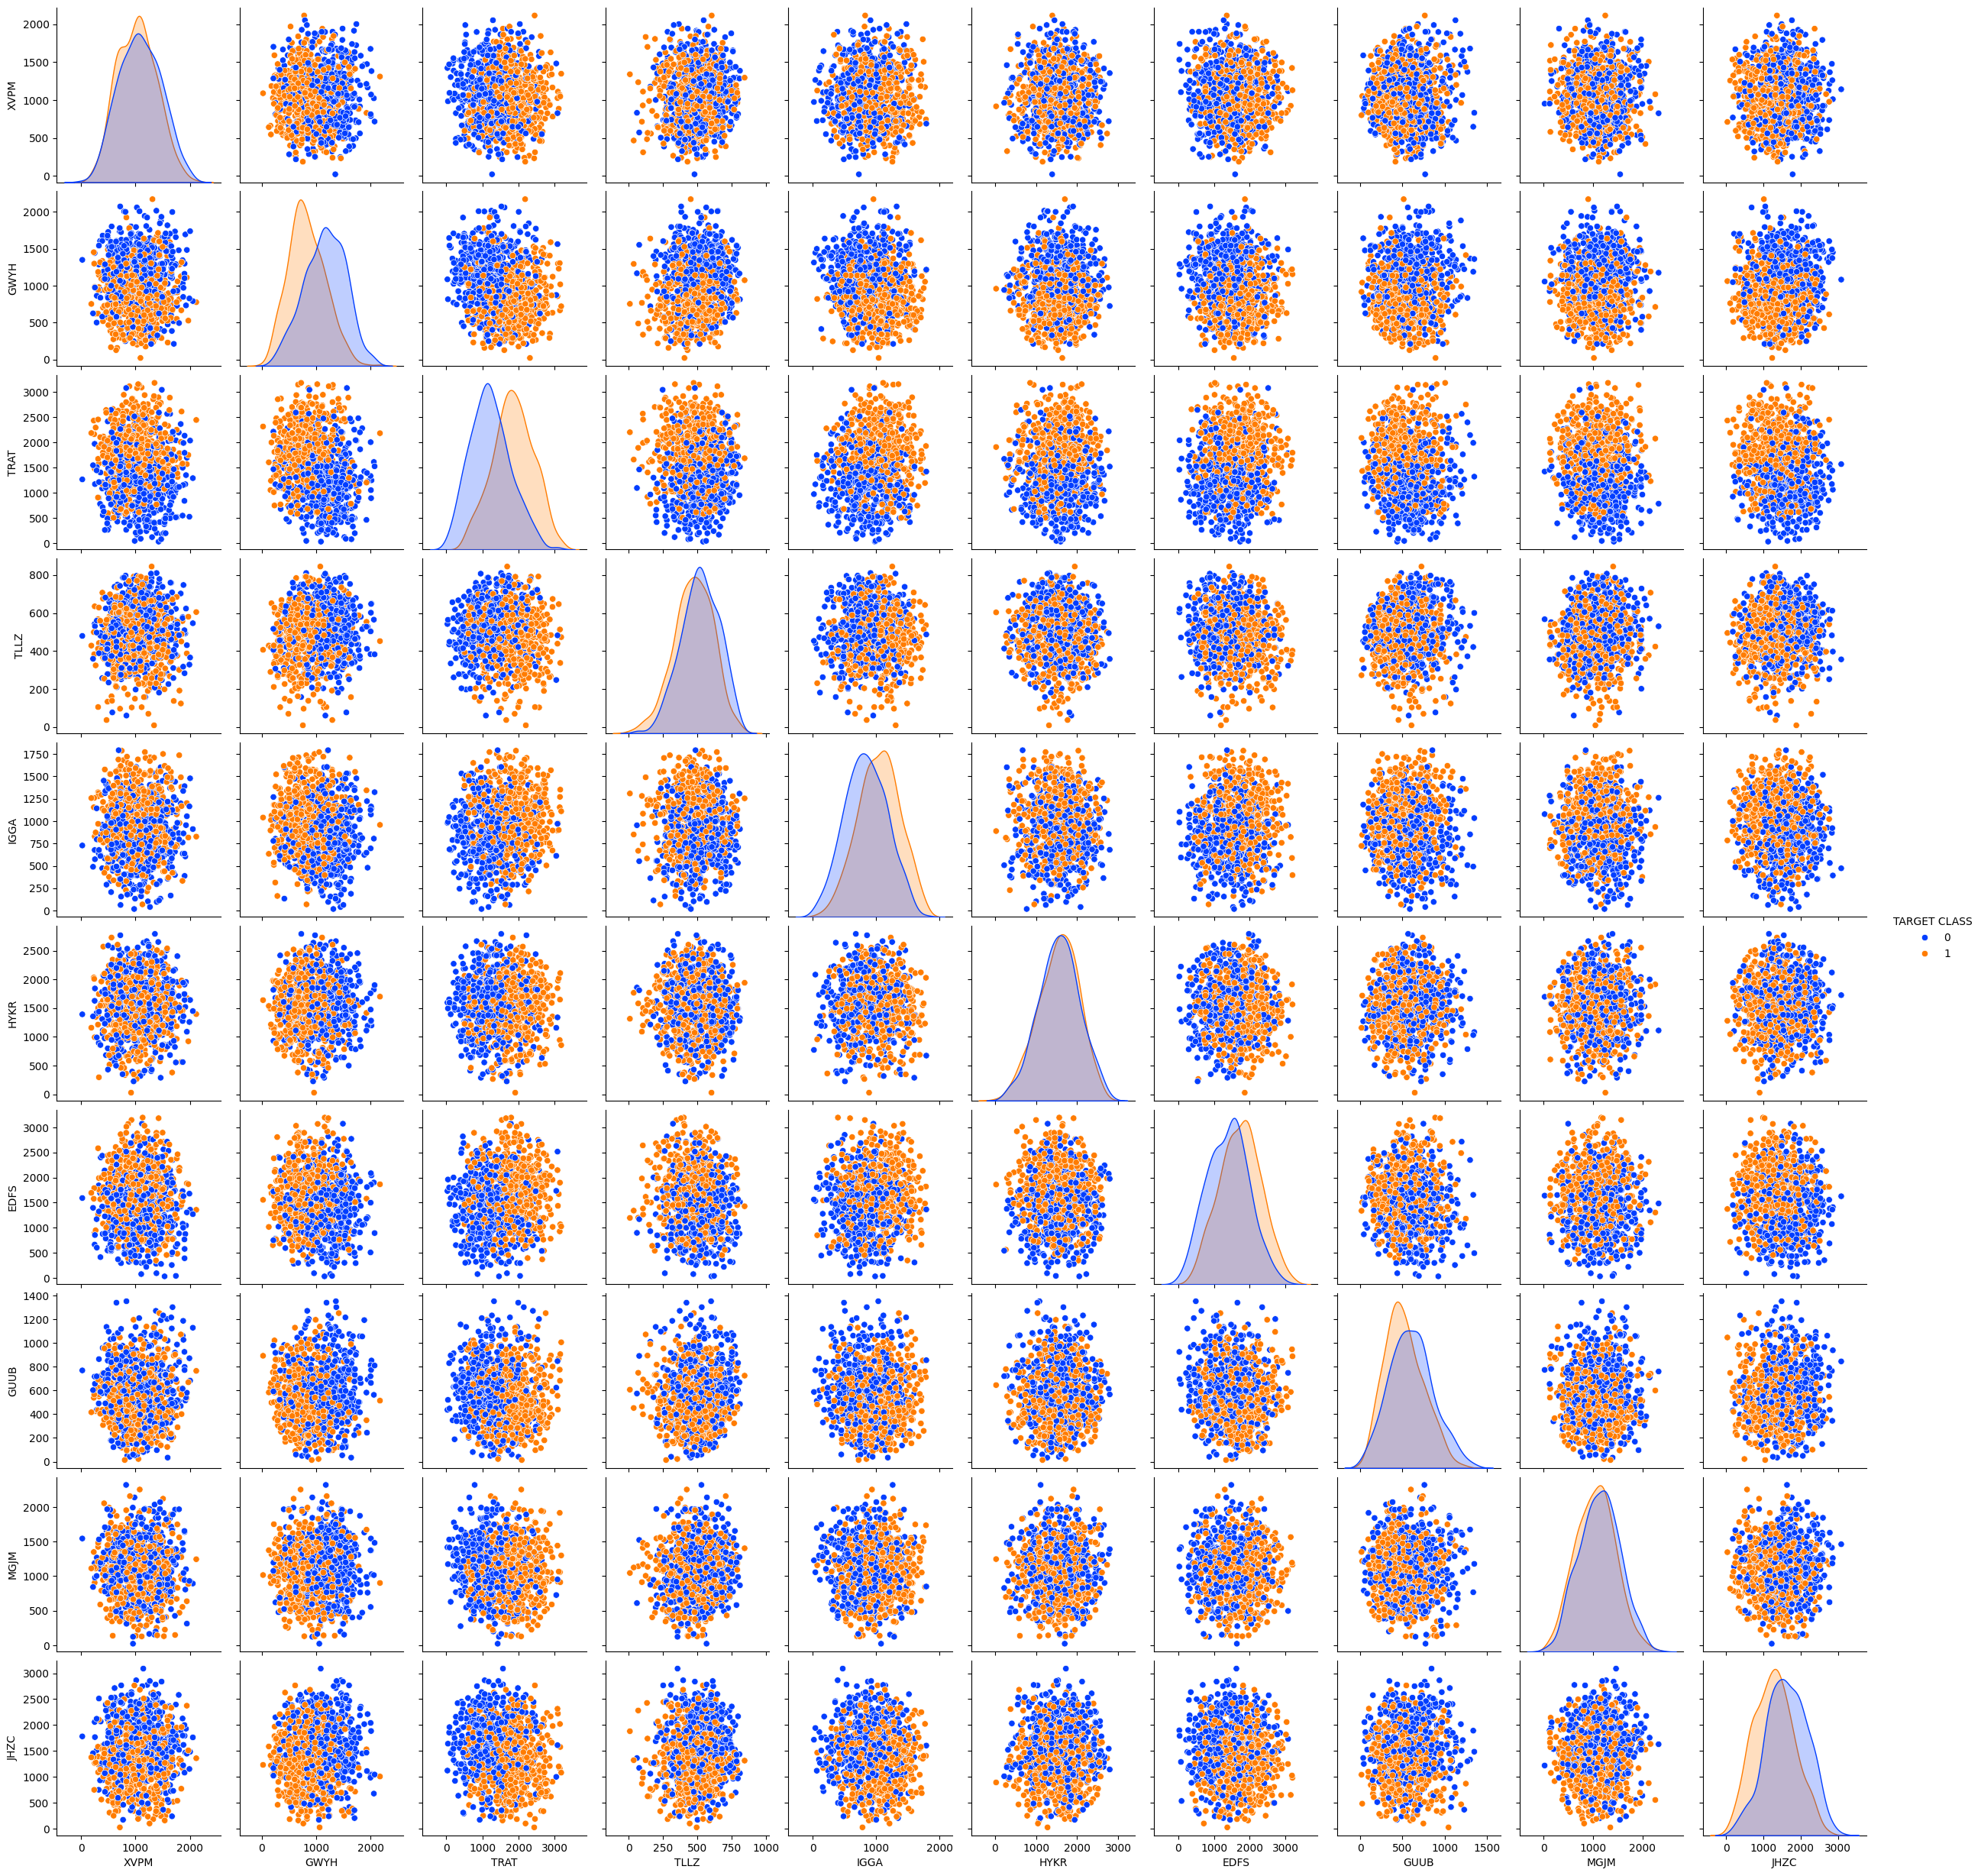

In [8]:
sns.pairplot(df,hue='TARGET CLASS',palette='bright') # visualize the data of different categories in one plot

## Standerdization for scalling the data in same range or scale

In [9]:
from sklearn.preprocessing import StandardScaler # importing function from sklearn (scikit learn)

In [10]:
scaler = StandardScaler() # create varriable and call function
# this the one of the scalling method use to scale the data in same range

In [11]:
scaler.fit(df.drop('TARGET CLASS',axis =1)) # fit the scaler except target column
# we are performing the fit function to do the scalling on the given dataset

StandardScaler()

In [12]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))
# return the values in dataframe after applying the scalling function except target column

In [13]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head() # show head rows of scaled_features dataframe and assign to df_feat

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

In [14]:
from sklearn.model_selection import train_test_split
# here we are performing spliting of the data in train and testing dataset so we calling train test split lybrary from sklearn librar

## Spliting  the data into training and testing

In [15]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],test_size = 0.30)
# split the test and train data here i pass 0.30 so my test dataset size is 30% so my traing dataset is 70% of whole dataset

## Model selction

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier(n_neighbors = 1) # k = 1 in knn

In [18]:
knn.fit(X_train,y_train) 
# fit the value for k in x_train and y_train
# trying to fit the model knn classifiear over the given dataset with k value 1 so as to learn the feature from the dataset

KNeighborsClassifier(n_neighbors=1)

In [19]:
pred = knn.predict(X_test) # predict the value using knn = 1 and x test

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
# we are importing classification_report and confusion_matrix library from sklearn for cheking the accuracy matrix

## Confusion matrix

In [21]:
print(confusion_matrix(y_test,pred)) # print confusion matrix

[[ 95  55]
 [ 36 114]]


In [22]:
print(classification_report(y_test,pred)) # print the pridected y_test report

              precision    recall  f1-score   support

           0       0.73      0.63      0.68       150
           1       0.67      0.76      0.71       150

    accuracy                           0.70       300
   macro avg       0.70      0.70      0.70       300
weighted avg       0.70      0.70      0.70       300



In [23]:
error_rate = [] # declaring an empty list
# running the for loop to find the optimize k value 
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test)) # we are appending the error in the list where ever the predicted value 
    # doent match with the actual value
# make list and add the mean value where predct values in it which x test is not equal to to the y test

In [24]:
np.mean(pred_i != y_test) # find the mean of that values where pred_i is not equal to the y_test and show that mean

0.16666666666666666

In [25]:
print(i,error_rate)

39 [0.30333333333333334, 0.27666666666666667, 0.23, 0.19, 0.17666666666666667, 0.17333333333333334, 0.18333333333333332, 0.17, 0.16333333333333333, 0.14666666666666667, 0.16666666666666666, 0.15333333333333332, 0.18, 0.16333333333333333, 0.17, 0.16333333333333333, 0.16666666666666666, 0.15333333333333332, 0.18666666666666668, 0.16, 0.16333333333333333, 0.15666666666666668, 0.16666666666666666, 0.15666666666666668, 0.18333333333333332, 0.18333333333333332, 0.18333333333333332, 0.17333333333333334, 0.17, 0.16666666666666666, 0.16666666666666666, 0.16, 0.17333333333333334, 0.15666666666666668, 0.16333333333333333, 0.16, 0.17666666666666667, 0.17333333333333334, 0.16666666666666666]


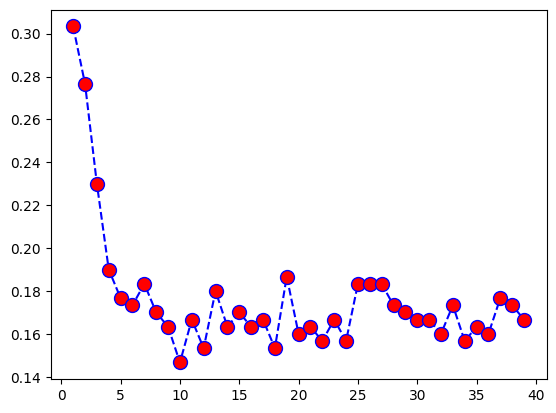

In [26]:
plt.figure(figure=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
# here we are finding the optimize k value to error value

In [27]:
# here we are cheking the performance of the model with the help of accuracy matix
# we are passing the k value 30 to the knn clssifiear algorithm
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('WITh K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))


WITh K=30


[[118  32]
 [ 18 132]]


              precision    recall  f1-score   support

           0       0.87      0.79      0.83       150
           1       0.80      0.88      0.84       150

    accuracy                           0.83       300
   macro avg       0.84      0.83      0.83       300
weighted avg       0.84      0.83      0.83       300

